### Importing Libraries

In [1]:
import numpy as np # Linear algebra
import pandas as pd # Data processing, CSV file I/O 
import seaborn as sns # Data visualization and exploratory data analysis
import matplotlib.pyplot as plt # Data visualization and graphical plotting



### Data Exploration

In [2]:
#  Read Dataset

iris = pd.read_csv(r'data/iris.csv')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# checking for duplicates
iris[iris.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,species
142,5.8,2.7,5.1,1.9,virginica


In [5]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

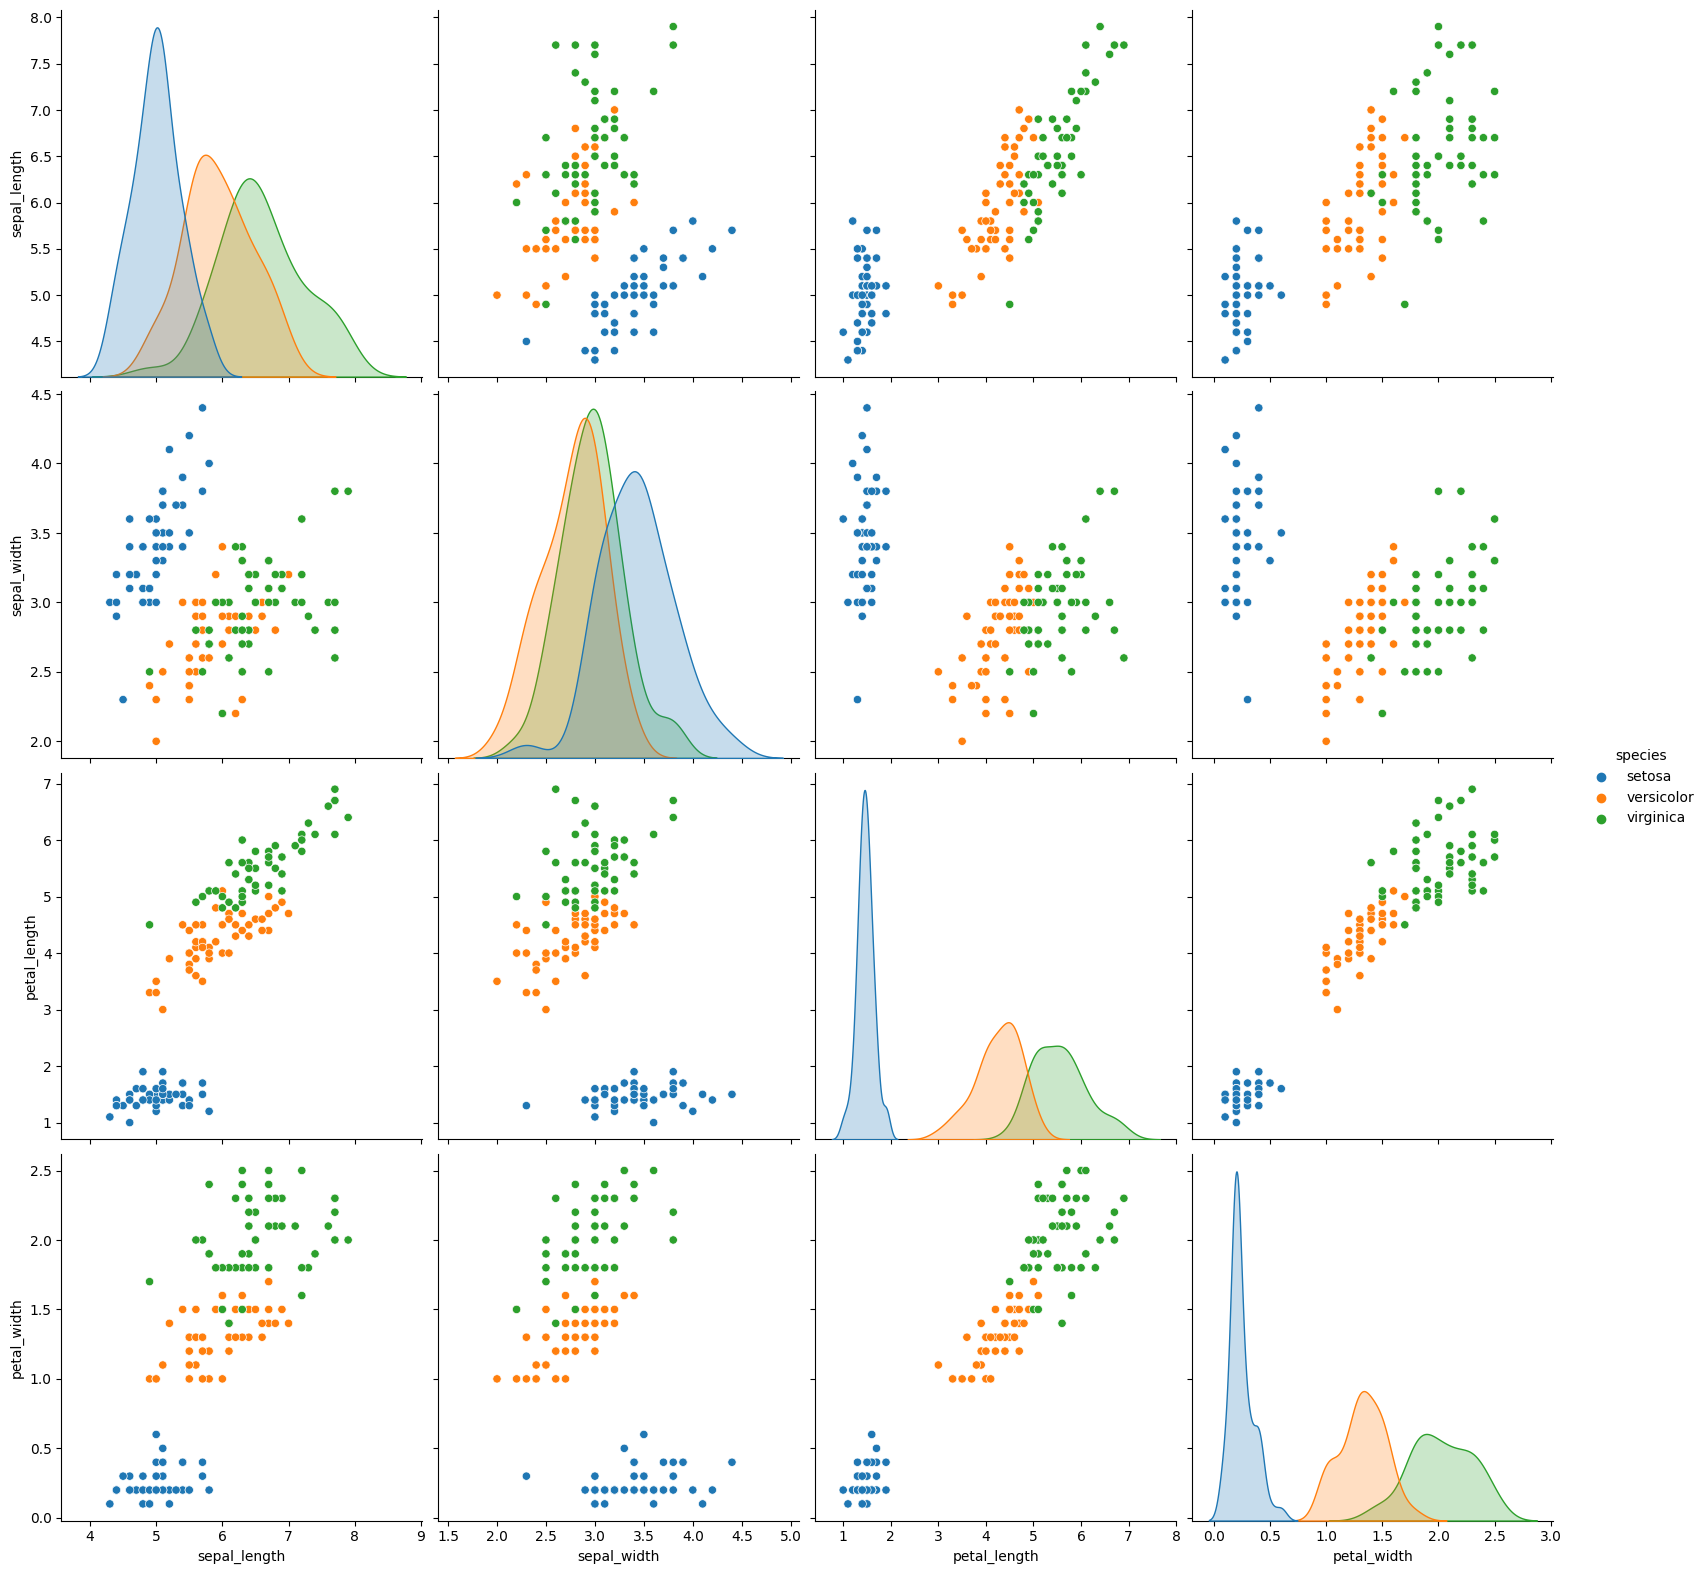

In [6]:
# Bi-variate Analysis

sns.pairplot(iris, hue='species', height=4)


### Classification Model

In [7]:
 # Splits data into random subsets for train and test data
from sklearn.model_selection import train_test_split
# Import Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier 

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics 
# Measure the quality of predictions from a classification algorithm
from sklearn.metrics import classification_report 
 #equal to the number of observations known to be in group and predicted to be in group
from sklearn.metrics import confusion_matrix


In [8]:
# features
X = iris.drop('species', axis=1)
# target
Y = iris['species']
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Split the data

In [9]:
#Before training the model we have split our data into Actual Train and Actual Test Dataset 
# for training and validating purpose...
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.30, random_state=42)

#spliting data into validation train and validation test
Xt, Xcv, Yt, Ycv = train_test_split(Xtrain, Ytrain, test_size=0.10, random_state=42)


In [10]:
# Create a Decision Tree classifier
clf = DecisionTreeClassifier(criterion='gini',
                             max_depth=5,
                             min_samples_split=5,
                             min_samples_leaf=2,
                             random_state=42)

# Train the classifier on the training data
clf.fit(Xt, Yt)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5,
                       random_state=42)

[Text(0.375, 0.9, 'x[2] <= 2.6\ngini = 0.665\nsamples = 94\nvalue = [30, 30, 34]'),
 Text(0.25, 0.7, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]'),
 Text(0.5, 0.7, 'x[3] <= 1.55\ngini = 0.498\nsamples = 64\nvalue = [0, 30, 34]'),
 Text(0.25, 0.5, 'x[2] <= 5.0\ngini = 0.124\nsamples = 30\nvalue = [0, 28, 2]'),
 Text(0.125, 0.3, 'gini = 0.0\nsamples = 28\nvalue = [0, 28, 0]'),
 Text(0.375, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.75, 0.5, 'x[2] <= 5.05\ngini = 0.111\nsamples = 34\nvalue = [0, 2, 32]'),
 Text(0.625, 0.3, 'x[1] <= 2.9\ngini = 0.375\nsamples = 8\nvalue = [0, 2, 6]'),
 Text(0.5, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.75, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.875, 0.3, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

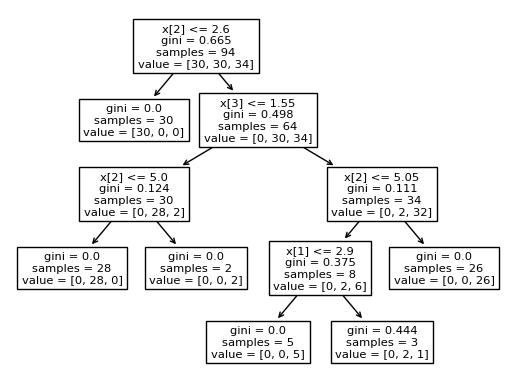

In [11]:
#Visualized the Tree which is formed on train dataset
from sklearn import tree
tree.plot_tree(clf)

In [12]:
# Install windows package from: 
# https://graphviz.gitlab.io/_pages/Download/Download_windows.html
# Install python graphviz package
# # %pip install graphviz
# Add C:\Program Files (x86)\Graphviz2.38\bin to User path
# Add C:\Program Files (x86)\Graphviz2.38\bin\dot.exe to System Path
# Close Jupyter And ReRun again 

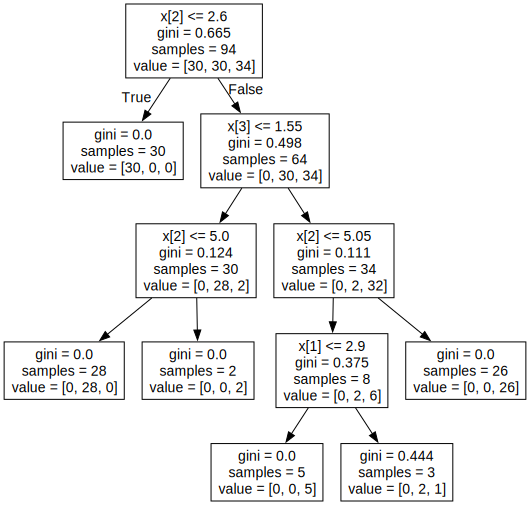

In [13]:
#Visualizing Decision Tree using graphviz library
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [16]:
# As our model has been trained....
#Now we can validate our Decision tree using cross validation method to get the accuracy or performance score of our model.
from sklearn.model_selection import cross_val_score
print('Accuracy score is:',cross_val_score(clf, Xt, Yt, cv=3, scoring='accuracy').mean())

Accuracy score is: 0.9361559139784946


In [21]:
#Checking validation test data on our trained model and getting performance metrices

from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

Y_hat = clf.predict(Xcv)

print('Accuracy score for validation test data is:',accuracy_score(Ycv, Y_hat))
multilabel_confusion_matrix(Ycv , Y_hat)

Accuracy score for validation test data is: 0.8181818181818182


array([[[10,  0],
        [ 0,  1]],

       [[ 3,  1],
        [ 1,  6]],

       [[ 7,  1],
        [ 1,  2]]], dtype=int64)

In [32]:
#Checking our model performance on actual unseen test data.. 
YT_hat = clf.predict(Xtest)
YT_hat

print('Model Accuracy Score on totally unseen data(Xtest) is:',accuracy_score(Ytest, YT_hat)*100,'%')
multilabel_confusion_matrix(Ytest , YT_hat)

Model Accuracy Score on totally unseen data(Xtest) is: 97.77777777777777 %


array([[[26,  0],
        [ 0, 19]],

       [[31,  1],
        [ 0, 13]],

       [[32,  0],
        [ 1, 12]]], dtype=int64)

[Text(0.3181818181818182, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.664\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.22727272727272727, 0.75, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4090909090909091, 0.75, 'x[2] <= 4.75\ngini = 0.5\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.18181818181818182, 0.5833333333333334, 'x[0] <= 4.95\ngini = 0.059\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2727272727272727, 0.4166666666666667, 'gini = 0.0\nsamples = 31\nvalue = [0, 31, 0]'),
 Text(0.6363636363636364, 0.5833333333333334, 'x[3] <= 1.75\ngini = 0.214\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.45454545454545453, 0.4166666666666667, 'x[2] <= 4.95\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]'),
 Text(0.36363636363636365, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.5454545454545454, 0.25, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.45454

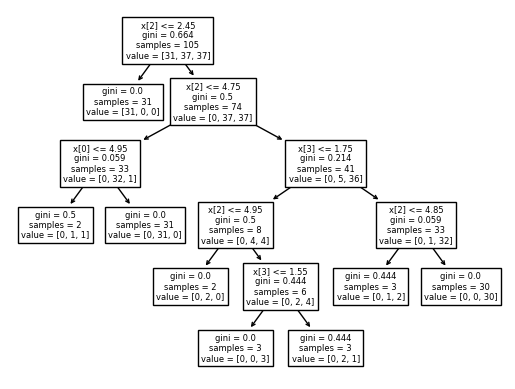

In [26]:
'''Training model on Actual train data... '''
Final_CLF = DecisionTreeClassifier(criterion='gini',
                             max_depth=5,
                             min_samples_split=5,
                             min_samples_leaf=2,
                             random_state=42)
Final_CLF.fit(Xtrain, Ytrain)

#Visualize tree structure..
tree.plot_tree(Final_CLF)

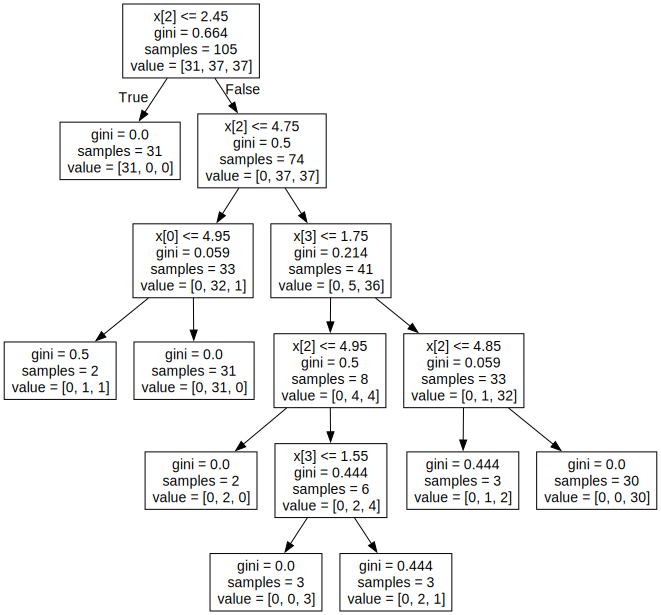

In [28]:
#Final Decision tree build for deploying in real world cases....

dot_data = tree.export_graphviz(Final_CLF, out_file=None)
graph = graphviz.Source(dot_data)
graph

In [30]:
# Print classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
#Checking the performance of model on Actual Test data...

YT_Pred = Final_CLF.predict(Xtest)


print('Model Accuracy Score on totally unseen data(Xtest) is:',
      accuracy_score(Ytest, YT_Pred)*100,'%')

print(confusion_matrix(Ytest , YT_Fhat))
print(classification_report(Ytest , YT_Fhat))

Model Accuracy Score on totally unseen data(Xtest) is: 100.0 %
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

